In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
import os
import sys
from classy import Class
# Needed for the model class to work inside a Notebook.
os.environ["COBAYA_NOMPI"] = "True"
# Add everything to our paths.
repo = "/pscratch/sd/m/mmaus/Cobaya_EPT_DESI/"
for codedir in ["rsd_likelihood","emulator/abacus_fid"]:
# for codedir in ["rsd_likelihood","emulator"]:
    sys.path.append(repo+codedir)

In [3]:
from cobaya.yaml          import yaml_load_file
from cobaya.samplers.mcmc import plot_progress
from cobaya.model         import get_model
#
from getdist.mcsamples    import MCSamplesFromCobaya
from getdist.mcsamples    import loadMCSamples
from getdist.mcsamples    import MCSamples
import getdist.plots      as     gdplt
import scipy.stats as stats

# Plot Contours

In [25]:
info = yaml_load_file("fs_abacus_am_omb.yaml")
print(info['params'].keys())
print(info['output'])
info['debug']=False

dict_keys(['H0', 'omega_b', 'omega_cdm', 'logA', 'sigma8', 'omegam', 'b1_LRG', 'b2_LRG', 'bs_LRG', 'b3_LRG'])
cosmo_chains/mocks/LRG/KP5_tests/b3/pk


array([<AxesSubplot:ylabel='$R-1$'>, <AxesSubplot:ylabel='acc. rate'>],
      dtype=object)

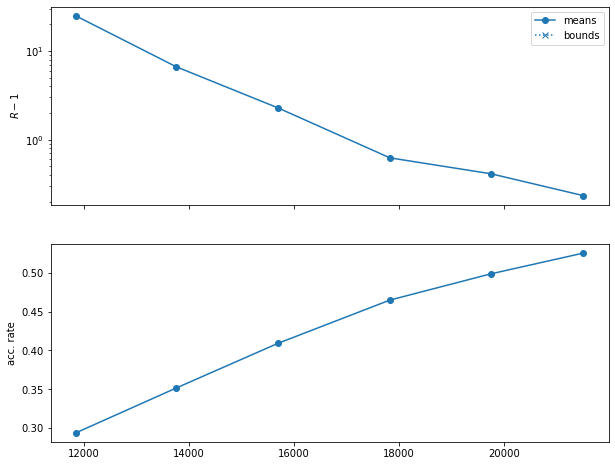

In [26]:
plot_progress(info['output'],figure_kwargs={"figsize": (10,8)})

Mean:
[ 6.65813200e+01  2.17051883e-02  1.16691763e-01  3.06966462e+00
  1.97965907e+00 -2.53789289e+00  2.07564559e+00  3.59072225e-01
  8.01420964e-01  3.13627200e-01  9.15606885e+00  9.15606885e+00
  3.58559704e+01  3.58559704e+01]
R-1 0.008832958391634733


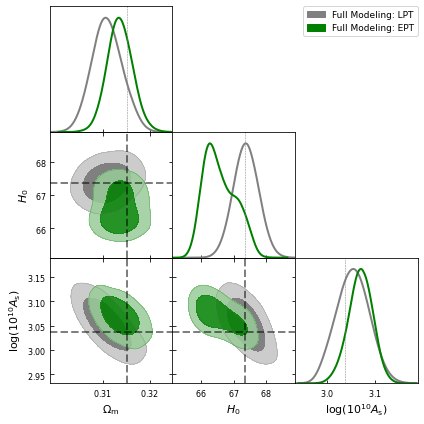

In [31]:
samples = loadMCSamples(os.path.abspath(info["output"]),no_cache=True, \
                        settings={'ignore_rows':0.3, 'contours': [0.68, 0.95],\
                                 })

samples1 = loadMCSamples('../new_template/Cobaya_template/cosmo_chains/mocks/LRG/KP5_tests/orig/pk' ,no_cache=True, \
                        settings={'ignore_rows':0.3, 'contours': [0.68, 0.95],\
                                 })

mean  = samples.getMeans()
errs = np.sqrt(samples.getVars())
print("Mean:")
print(mean)
print("R-1", samples.getGelmanRubin())

gdplot = gdplt.get_subplot_plotter()

gdplot.triangle_plot([samples1,samples],\
                     ["omegam","H0",'logA'],\
                     filled=True,\
                     title_limit=0,contour_lws=2,figure_kwargs={"figsize": (15,15)},\
                    markers = [0.3151917236639384,67.36,np.log(1e10 * 2.0830e-9)],contour_colors= ['grey','green'],marker_args={'alpha':0.5,'lw':2,'c':'k'},\
                     legend_labels=['Full Modeling: LPT','Full Modeling: EPT'])

# gdplot.triangle_plot([samples],\
#                      ["omegam","H0",'logA','b1_LRG','b2_LRG','bs_LRG','b3_LRG'],\
#                      filled=True,\
#                      title_limit=0,contour_lws=2,figure_kwargs={"figsize": (15,15)},\
#                     markers = [0.3151917236639384,67.36,np.log(1e10 * 2.0830e-9)],contour_colors= ['grey','green'],marker_args={'alpha':0.5,'lw':2,'c':'k'},\
#                      legend_labels=['Full Modeling: EPT'])

In [24]:
samples1.getMeans(),samples.getMeans()

(array([ 6.73827127e+01,  2.24497934e-02,  1.18085271e-01,  3.05366231e+00,
         1.57946420e+00, -8.22863182e-01, -3.92370270e-01,  8.06593566e-01,
         3.10920159e-01,  1.56562581e+00,  1.56562581e+00,  3.09904579e+01,
         3.09904579e+01]),
 array([ 6.65733519e+01,  2.17114288e-02,  1.16937108e-01,  3.06528123e+00,
         1.98460905e+00, -2.68088299e+00,  2.10540582e+00,  8.00761485e-01,
         3.14269632e-01,  5.90067551e+00,  5.90067551e+00,  3.54476907e+01,
         3.54476907e+01]))

# Best-fit Model

In [30]:
model= get_model(info)
# model_temp= get_model(temp_basepath + "template_z1_pk.yaml")
print(list(model.parameterization.sampled_params()))
print(info['output'])

[model] *WARNING* Ignored blocks/options: ['sampler', 'output', 'stop_on_error']
Loading Taylor series.
['LRG'] ['mock_data/LRG/pk/z0.800/Pk_mean.txt']
We are here!
['H0', 'omega_b', 'omega_cdm', 'logA', 'b1_LRG', 'b2_LRG', 'bs_LRG', 'b3_LRG']
cosmo_chains/mocks/LRG/KP5_tests/b3/pk
